<a href="https://colab.research.google.com/github/Rin4797/Data_Augmentation_Research/blob/main/drafts/Augmentation_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle

import tensorflow as tf

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14346282344463024945
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15240134656
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 986943446015373347
 physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0"
 xla_global_id: 416903419]

In [3]:
# загрузка файла с классом для визуализации

from google.colab import files
files.upload()

import sys
import os

py_file_location = "/content/visualization.py"
sys.path.append(os.path.abspath(py_file_location))

from visualization import DataVisualization, ModelVisualization, draw_dataframe

Saving visualization.py to visualization (2).py


# Датасет

## Загрузка датасета

In [4]:
!mkdir data
%cd data

mkdir: cannot create directory ‘data’: File exists
/content/data


In [5]:
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvf 'cifar-10-python.tar.gz'
!rm cifar-10-python.tar.gz

--2023-09-09 01:09:49--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  29.7MB/s    in 6.1s    

2023-09-09 01:09:55 (26.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [6]:
%cd cifar-10-batches-py
!ls
%cd ..
%cd ..

/content/data/cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch
/content/data
/content


## Формирование данных

In [7]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [8]:
# список названия классов

cifar_label_data = unpickle('data/cifar-10-batches-py/batches.meta')
label_names = cifar_label_data[b'label_names']
for i in range(len(label_names)):
    label_names[i] = label_names[i].decode('ASCII')
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
def unpack_batch(batch_name):
    cifar_data = unpickle('data/cifar-10-batches-py/' + batch_name)
    data = cifar_data[b'data']
    labels = np.array(cifar_data[b'labels'])
    return data, labels

In [10]:
x_train = np.empty((0, 3072))
y_train = np.empty((0, ))
for i in range(5):
    data, labels = unpack_batch('data_batch_' + str(i + 1))
    x_train = np.concatenate((x_train, data), axis=0)
    y_train = np.concatenate((y_train, labels), axis=0)
print(x_train.shape, y_train.shape)

(50000, 3072) (50000,)


In [11]:
x_test, y_test = unpack_batch('test_batch')
print(x_test.shape, y_test.shape)

(10000, 3072) (10000,)


In [12]:
data = DataVisualization(label_names, x_train, y_train, x_test, y_test)

In [13]:
data.shuffle_data()
data.make_val(1000)
data.make_data()

## Описание датасета

In [14]:
data.make_data_stat()

In [15]:
data.size_data_analysis()

,name,size,std
0,train,49000,14.198591
1,val,1000,14.198591
2,test,10000,0.000000


In [16]:
data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,4906,4889,4874,4910,4910,4913,4910,4887,4884,4917
1,val,94,111,126,90,90,87,90,113,116,83
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## Уменьшенный датасет

In [17]:
sample_size = int(x_train.shape[0] * 0.2)

indexes = np.random.choice(x_train.shape[0], sample_size, replace=False)

In [18]:
small_data = DataVisualization(label_names, x_train[indexes], y_train[indexes], x_test, y_test)

In [19]:
small_data.make_val(int(small_data.x_train.shape[0] * 0.02))
small_data.make_data()

In [20]:
small_data.make_data_stat()

In [21]:
small_data.size_data_analysis()

,name,size,std
0,train,9800,26.870058
1,val,200,3.949684
2,test,10000,0.000000


In [22]:
small_data.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,989,1011,1021,928,979,978,954,954,1000,986
1,val,18,19,26,15,19,20,26,19,14,24
2,test,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


## Аугментация

### Augmentation as a layes

#### Resize and rescale

In [23]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(32, 32),
  tf.keras.layers.Rescaling(1./255)
])

#### Random rotate and flip

In [24]:
random_rotate_and_flip = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.4),
])

#### Random zoom

In [25]:
random_zoom = tf.keras.Sequential([
    tf.keras.layers.RandomZoom((0.2, 0.9), (0.2, 0.9)),
    tf.keras.layers.Resizing(32, 32)
])

#### Random contrast

In [26]:
random_contrast = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.7),
    tf.keras.layers.Resizing(32, 32)
])

#### Random brightness

In [27]:
random_brightness = tf.keras.Sequential([
    tf.keras.layers.RandomBrightness((-0.5, 0.5)),
    tf.keras.layers.Resizing(32, 32)
])

### Augmentation with dataset

In [28]:
def image_format(image_data):
    return (np.transpose(image_data.reshape(32, 32, 3, order='F'), axes=[1,0,2]))

In [29]:
small_dataset = small_data.x_train.tolist()
for i in range(len(small_dataset)):
    small_dataset[i] = image_format(np.array(small_dataset[i]))
small_dataset = np.array(small_dataset)
small_dataset.shape

(9800, 32, 32, 3)

#### Flip left to right

In [30]:
flipped = tf.image.flip_left_right(small_dataset).numpy()
flipped.shape

(9800, 32, 32, 3)

In [31]:
flipped_data = DataVisualization(label_names, flipped.reshape(flipped.shape[0], 3072),
                                 small_data.y_train, x_test, y_test)
flipped_data.make_val(int(flipped_data.x_train.shape[0] * 0.02))
flipped_data.make_data()

#### Grayscale

In [32]:
grayscaled = tf.image.rgb_to_grayscale(small_dataset).numpy()
flipped_grayscaled = tf.image.rgb_to_grayscale(flipped).numpy()

In [33]:
grayscaled[2].shape

(32, 32, 1)

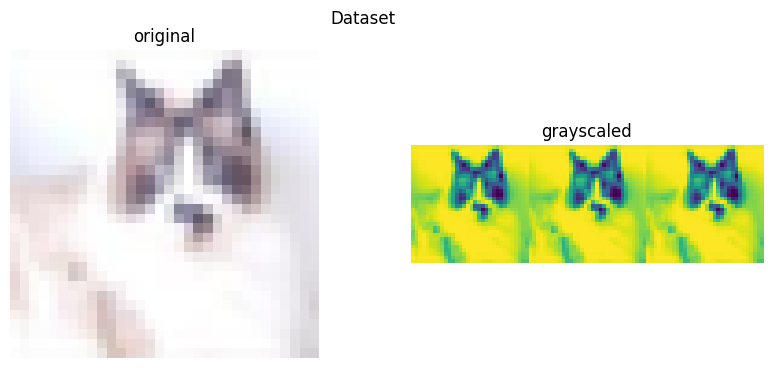

In [34]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace=0.3)
plt.imshow(small_dataset[2] / 255)
plt.title("original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace=0.3)
plt.imshow(np.concatenate((grayscaled[2], grayscaled[2], grayscaled[2]), axis=1) / 255)
plt.title("grayscaled")
plt.axis('off')

_ = plt.suptitle("Dataset")

In [35]:
grayscaled = np.concatenate((grayscaled, grayscaled, grayscaled), axis=3)
flipped_grayscaled = np.concatenate((flipped_grayscaled, flipped_grayscaled, flipped_grayscaled), axis=3)
grayscaled.shape

(9800, 32, 32, 3)

In [36]:
grayscaled_data = DataVisualization(label_names, grayscaled.reshape(grayscaled.shape[0], 3072),
                                    small_data.y_train, x_test, y_test)
grayscaled_data.make_val(int(grayscaled_data.x_train.shape[0] * 0.02))
grayscaled_data.make_data()

In [37]:
flipped_grayscaled_data = DataVisualization(label_names, flipped_grayscaled.reshape(flipped_grayscaled.shape[0], 3072),
                                    small_data.y_train, x_test, y_test)
flipped_grayscaled_data.make_val(int(flipped_grayscaled_data.x_train.shape[0] * 0.02))
flipped_grayscaled_data.make_data()

#### Adjusting the saturation

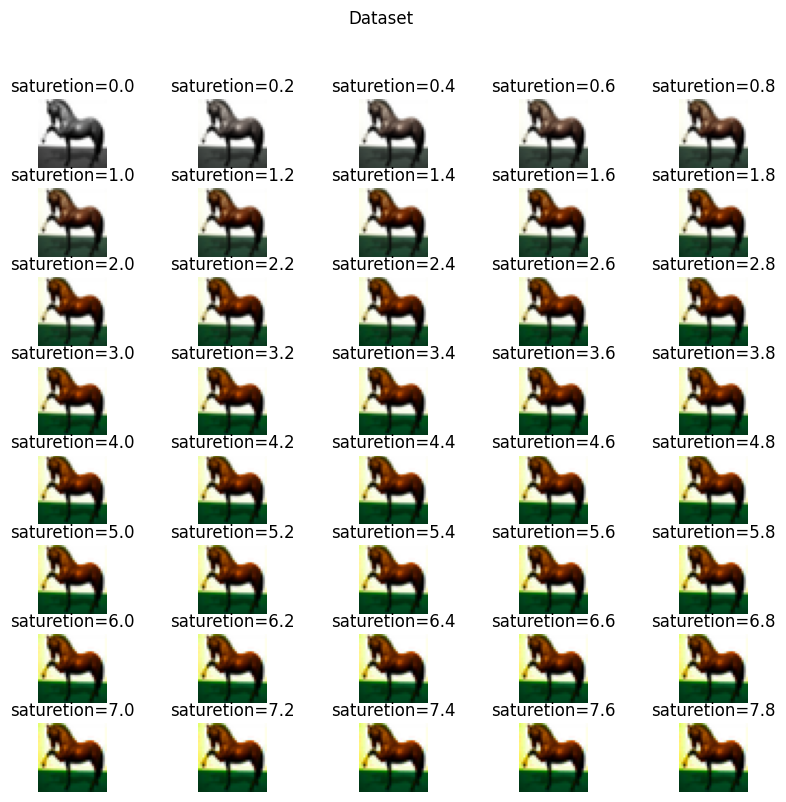

In [38]:
image = small_dataset[0]

plt.figure(figsize=(10, 9))
for n in range(40):
    plt.subplot(8, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(tf.image.adjust_saturation(image, n/5) / 255)
    plt.title("saturetion=" + str(n/5))
    plt.axis('off')
_ = plt.suptitle("Dataset")

In [39]:
saturated = np.empty((0, 32, 32, 3))
for i in range(4):
    saturated = np.concatenate((saturated, tf.image.adjust_saturation(
        np.concatenate((small_dataset, flipped), axis=0), i / 2)), axis=0)
saturated.shape

(78400, 32, 32, 3)

In [40]:
saturated_data = DataVisualization(label_names, saturated.reshape(saturated.shape[0], 3072),
                                   np.tile(small_data.y_train, 8), x_test, y_test)
saturated_data.make_val(int(saturated_data.x_train.shape[0] * 0.02))
saturated_data.make_data()

#### Random saturation

In [41]:
random_saturated = tf.image.random_saturation(
    small_dataset, 0, 4).numpy()
flipped_random_saturated = tf.image.random_saturation(
    flipped, 0, 4).numpy()

In [42]:
random_saturated_data = DataVisualization(label_names,
                                          random_saturated.reshape(random_saturated.shape[0], 3072),
                                          small_data.y_train, x_test, y_test)
random_saturated_data.make_val(int(random_saturated_data.x_train.shape[0] * 0.02))
random_saturated_data.make_data()

In [43]:
flipped_random_saturated_data = DataVisualization(label_names,
                                          flipped_random_saturated.reshape(random_saturated.shape[0], 3072),
                                          small_data.y_train, x_test, y_test)
flipped_random_saturated_data.make_val(int(flipped_random_saturated_data.x_train.shape[0] * 0.02))
flipped_random_saturated_data.make_data()

#### Adjusting the brightness

<ipython-input-44-7aea50ce891c>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(tf.image.adjust_brightness(image.astype(np.float) / 255., ((n - 10)/10)).numpy())


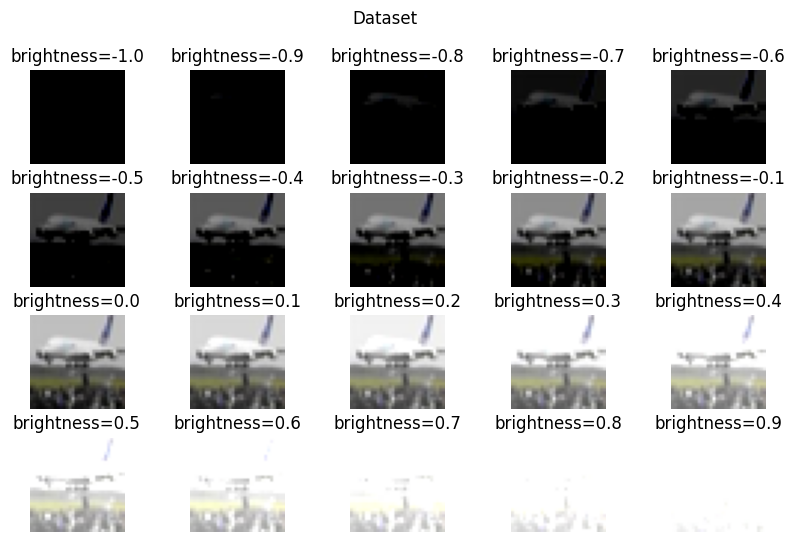

In [44]:
image = small_dataset[7]

plt.figure(figsize=(10, 6))
for n in range(20):
    plt.subplot(4, 5, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(tf.image.adjust_brightness(image.astype(np.float) / 255., ((n - 10)/10)).numpy())
    plt.title("brightness=" + str((n - 10)/10))
    plt.axis('off')
_ = plt.suptitle("Dataset")

In [45]:
bright = np.empty((0, 32, 32, 3))
for i in range(-2, 5, 2):
    bright = np.concatenate((bright, ((tf.image.adjust_brightness(
        np.concatenate((small_dataset, flipped), axis=0).astype(np.float) / 255, i / 10))
            * 255).numpy().astype(np.uint8)), axis=0)
bright.shape

<ipython-input-45-10020e824ec9>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.concatenate((small_dataset, flipped), axis=0).astype(np.float) / 255, i / 10))


(78400, 32, 32, 3)

In [46]:
bright_data = DataVisualization(label_names, bright.reshape(bright.shape[0], 3072),
                                np.tile(small_data.y_train, 8), x_test, y_test)
bright_data.make_val(int(bright_data.x_train.shape[0] * 0.02))
bright_data.make_data()

#### Random brightness

In [47]:
random_bright = tf.image.random_brightness(
    small_dataset, 3).numpy()
flipped_random_bright = tf.image.random_brightness(
    flipped, 3).numpy()

In [48]:
random_bright_data = DataVisualization(label_names, random_bright.reshape(random_bright.shape[0], 3072),
                                       small_data.y_train, x_test, y_test)
random_bright_data.make_val(int(random_bright_data.x_train.shape[0] * 0.02))
random_bright_data.make_data()

In [49]:
flipped_random_bright_data = DataVisualization(label_names, random_bright.reshape(flipped_random_bright.shape[0], 3072),
                                       small_data.y_train, x_test, y_test)
flipped_random_bright_data.make_val(int(flipped_random_bright_data.x_train.shape[0] * 0.02))
flipped_random_bright_data.make_data()

### Augmentated data 1

In [50]:
data1 = small_data + flipped_data + grayscaled_data + flipped_grayscaled_data + saturated_data + bright_data

In [51]:
data1.make_val(int(data1.x_train.shape[0] * 0.02))
data1.make_data()

In [52]:
data1.make_data_stat()

In [53]:
data1.size_data_analysis()

,name,size,std
0,train,188431,517.121349
1,val,3845,17.030854
2,test,60000,0.000000


In [54]:
data1.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,19066,19433,19627,17850,18792,18794,18343,18341,19241,18944
1,val,364,398,408,387,376,384,371,372,417,368
2,test,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


### Augmentated data 2

In [55]:
data2 = (small_data + flipped_data + grayscaled_data + flipped_grayscaled_data + random_saturated_data + flipped_random_saturated_data +
     random_bright_data + flipped_random_bright_data)

In [56]:
data2.make_val(int(data1.x_train.shape[0] * 0.02))
data2.make_data()

In [57]:
data2.make_data_stat()

In [58]:
data2.size_data_analysis()

,name,size,std
0,train,73260,206.180503
1,val,3768,15.354478
2,test,80000,0.000000


In [59]:
data2.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,7434,7549,7635,6925,7279,7305,7121,7153,7505,7354
1,val,352,378,386,352,371,393,371,374,397,394
2,test,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000


### Augmentated data 3

In [60]:
data3 = (small_data + flipped_data + grayscaled_data + random_saturated_data + random_bright_data)

In [61]:
data3.make_val(int(data1.x_train.shape[0] * 0.02))
data3.make_data()

In [62]:
data3.make_data_stat()

In [63]:
data3.size_data_analysis()

,name,size,std
0,train,44448,126.041104
1,val,3768,15.354478
2,test,50000,0.000000


In [64]:
data3.class_data_analysis()

,name,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,train,4521,4585,4635,4204,4420,4425,4319,4336,4547,4456
1,val,352,378,386,352,371,393,371,374,397,394
2,test,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


# Нейросети

## MobileNet

In [65]:
model = tf.keras.applications.MobileNet(
    input_shape=(32, 32, 3), #image_size
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=10, #cifar-10
    classifier_activation="softmax"
)

In [66]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.summary()

Model: "mobilenet_1.00_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 16, 16, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 16, 16, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 16, 16, 32)  

## MobileNet c минимальной аугментацией

In [68]:
model1 = tf.keras.Sequential([
    resize_and_rescale,
    random_rotate_and_flip,
    model
])

In [69]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.build((None, 32, 32, 3))

In [70]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 mobilenet_1.00_32 (Functio  (None, 10)                3239114   
 nal)                                                            
                                                                 
Total params: 3239114 (12.36 MB)
Trainable params: 3217226 (12.27 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


## MobileNet c аугментацией

In [71]:
model2 = tf.keras.Sequential([
    resize_and_rescale,
    random_rotate_and_flip,
    random_zoom,
    random_contrast,
    random_brightness,
    model
])

In [72]:
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.build((None, 32, 32, 3))

In [73]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 sequential_2 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 sequential_3 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 sequential_4 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 mobilenet_1.00_32 (Functio  (None, 10)                3239114   
 nal)                                                            
                                                      

# Работа моделей

In [74]:
def run_model(model_work, epochs_num):
    model_work.model_fit(epochs_num)
    model_work.draw_model_plot()
    model_work.draw_model_results()

In [75]:
def result_model(model_work):
    model_work.make_predictions()
    model_work.draw_confusion_matrix()
    draw_dataframe(model_work.metrics(), 'model_results')

## MobileNet на исходном датасете

In [76]:
model_work = ModelVisualization(model, data)

Epoch 1/50
766/766 [==============================] - 31s 14ms/step - loss: 1.8520 - accuracy: 0.3181 - val_loss: 1.7278 - val_accuracy: 0.3750
Epoch 2/50
766/766 [==============================] - 10s 13ms/step - loss: 1.5000 - accuracy: 0.4566 - val_loss: 1.5992 - val_accuracy: 0.4490
Epoch 3/50
766/766 [==============================] - 10s 13ms/step - loss: 1.3330 - accuracy: 0.5219 - val_loss: 1.6022 - val_accuracy: 0.4910
Epoch 4/50
766/766 [==============================] - 10s 13ms/step - loss: 1.2309 - accuracy: 0.5683 - val_loss: 1.4099 - val_accuracy: 0.5330
Epoch 5/50
766/766 [==============================] - 10s 13ms/step - loss: 1.1507 - accuracy: 0.5984 - val_loss: 1.3192 - val_accuracy: 0.5580
Epoch 6/50
766/766 [==============================] - 10s 13ms/step - loss: 1.0704 - accuracy: 0.6283 - val_loss: 1.3755 - val_accuracy: 0.5780
Epoch 7/50
766/766 [==============================] - 10s 13ms/step - loss: 1.0034 - accuracy: 0.6526 - val_loss: 1.4111 - val_accuracy:

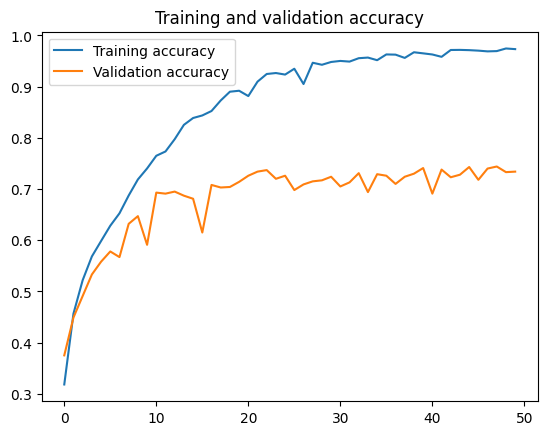

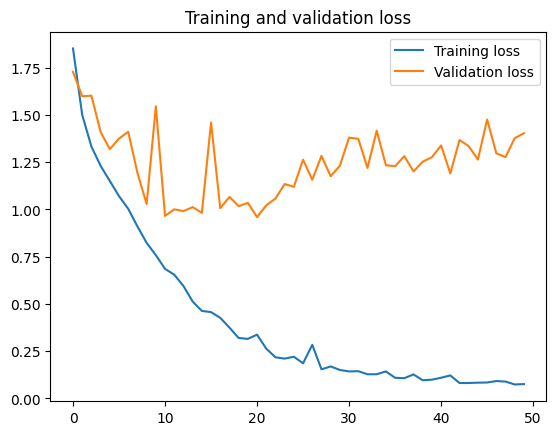

313/313 [==============================] - 2s 4ms/step - loss: 1.3019 - accuracy: 0.7389
Accuracy for test data :  0.7389000058174133
Loss for test data :  1.3018561601638794


In [77]:
run_model(model_work, 50)

157/157 [==============================] - 1s 3ms/step


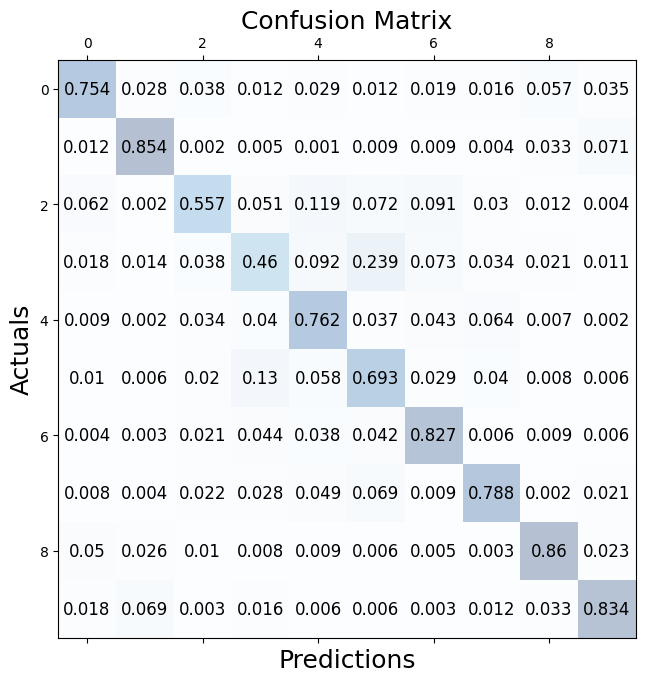

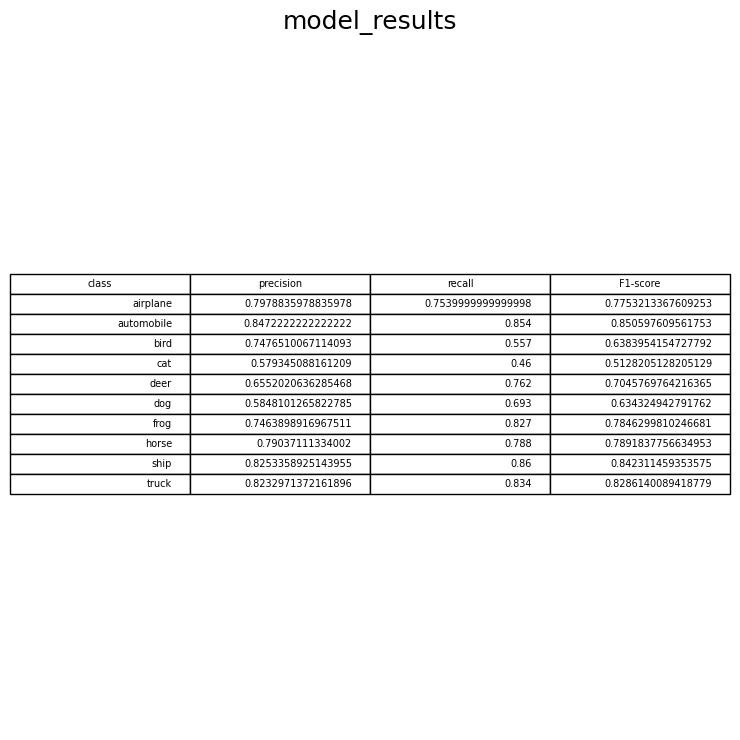

In [78]:
result_model(model_work)

## MobileNet на усеченном датасете

In [79]:
model1_work = ModelVisualization(model, small_data)

Epoch 1/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0871 - accuracy: 0.9755 - val_loss: 0.0675 - val_accuracy: 0.9800
Epoch 2/50
154/154 [==============================] - 2s 14ms/step - loss: 0.1840 - accuracy: 0.9442 - val_loss: 0.1267 - val_accuracy: 0.9700
Epoch 3/50
154/154 [==============================] - 2s 13ms/step - loss: 0.0911 - accuracy: 0.9705 - val_loss: 0.1307 - val_accuracy: 0.9450
Epoch 4/50
154/154 [==============================] - 2s 13ms/step - loss: 0.0274 - accuracy: 0.9919 - val_loss: 0.2185 - val_accuracy: 0.9400
Epoch 5/50
154/154 [==============================] - 2s 13ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.2008 - val_accuracy: 0.9300
Epoch 6/50
154/154 [==============================] - 2s 13ms/step - loss: 0.0219 - accuracy: 0.9940 - val_loss: 0.1483 - val_accuracy: 0.9550
Epoch 7/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0207 - accuracy: 0.9944 - val_loss: 0.3276 - val_accuracy: 0.9150

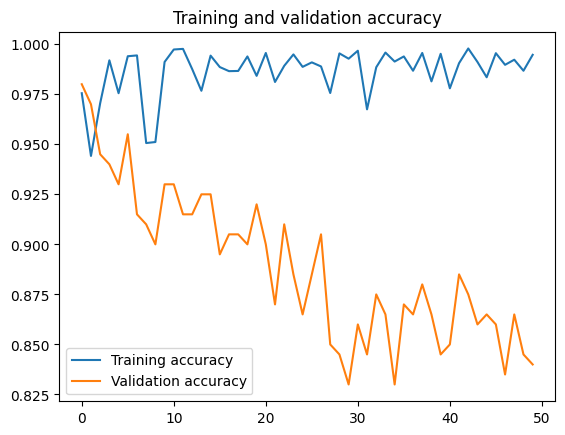

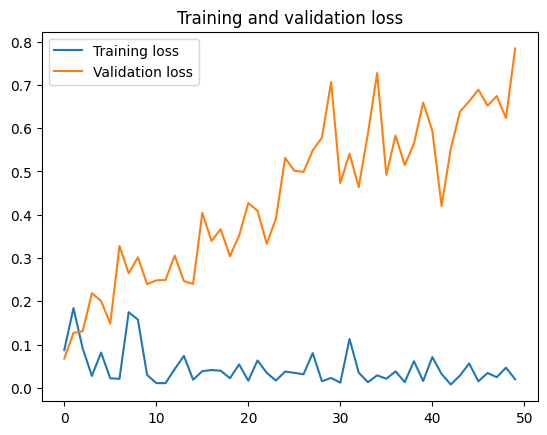

313/313 [==============================] - 1s 4ms/step - loss: 1.5659 - accuracy: 0.7207
Accuracy for test data :  0.7207000255584717
Loss for test data :  1.5658957958221436


In [80]:
run_model(model1_work, 50)

157/157 [==============================] - 1s 3ms/step


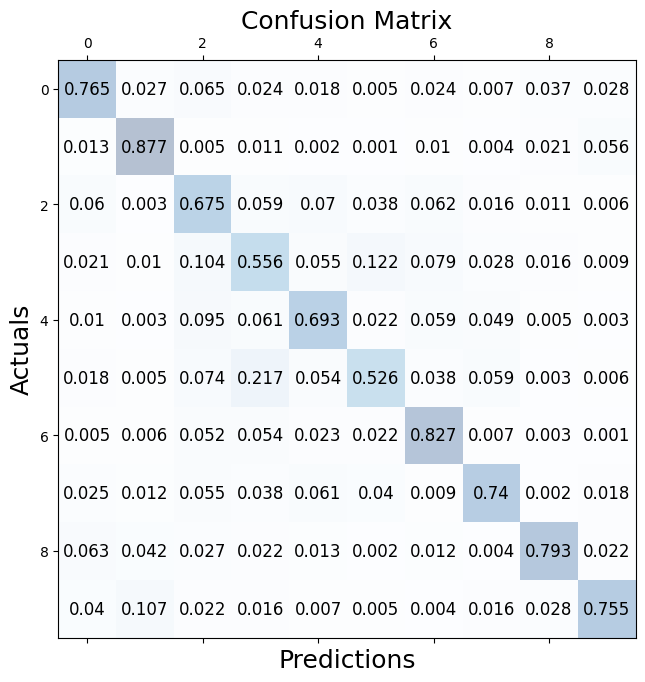

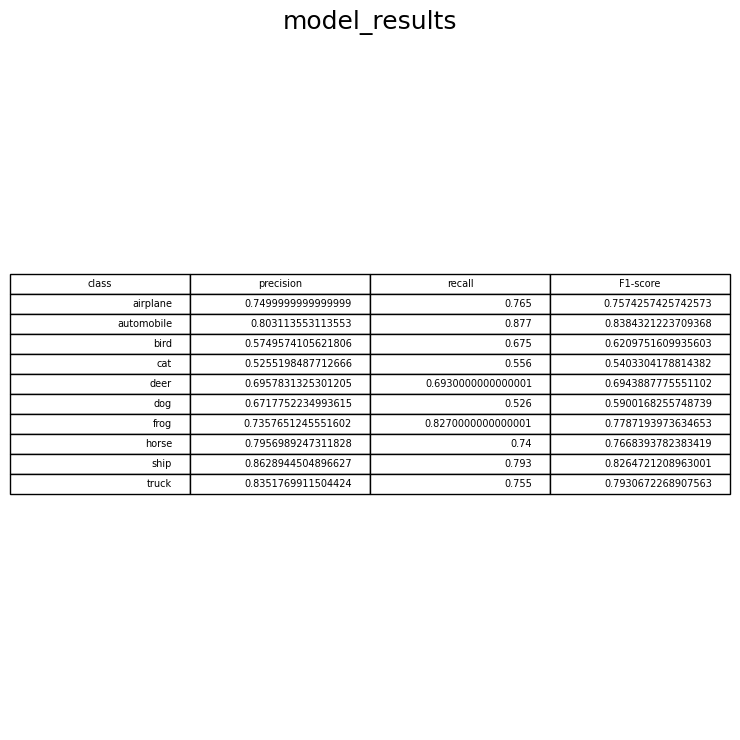

In [81]:
result_model(model1_work)

## MobileNet на усеченном датасете с аугментацией. Аугментация проводится в модели. Аугментация минимальная

In [82]:
model1_work = ModelVisualization(model1, data1)

Epoch 1/50
2945/2945 [==============================] - 56s 15ms/step - loss: 2.1928 - accuracy: 0.2228 - val_loss: 2.2774 - val_accuracy: 0.1282
Epoch 2/50
2945/2945 [==============================] - 45s 15ms/step - loss: 1.9378 - accuracy: 0.2911 - val_loss: 2.2499 - val_accuracy: 0.1628
Epoch 3/50
2945/2945 [==============================] - 42s 14ms/step - loss: 1.8477 - accuracy: 0.3280 - val_loss: 2.2225 - val_accuracy: 0.1659
Epoch 4/50
2945/2945 [==============================] - 42s 14ms/step - loss: 1.7807 - accuracy: 0.3541 - val_loss: 2.1789 - val_accuracy: 0.2036
Epoch 5/50
2945/2945 [==============================] - 42s 14ms/step - loss: 1.7243 - accuracy: 0.3729 - val_loss: 2.4148 - val_accuracy: 0.1506
Epoch 6/50
2945/2945 [==============================] - 42s 14ms/step - loss: 1.6828 - accuracy: 0.3903 - val_loss: 2.0742 - val_accuracy: 0.2333
Epoch 7/50
2945/2945 [==============================] - 42s 14ms/step - loss: 1.6368 - accuracy: 0.4065 - val_loss: 2.1344 -

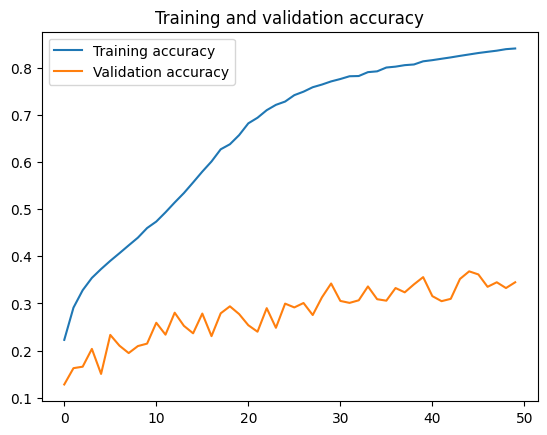

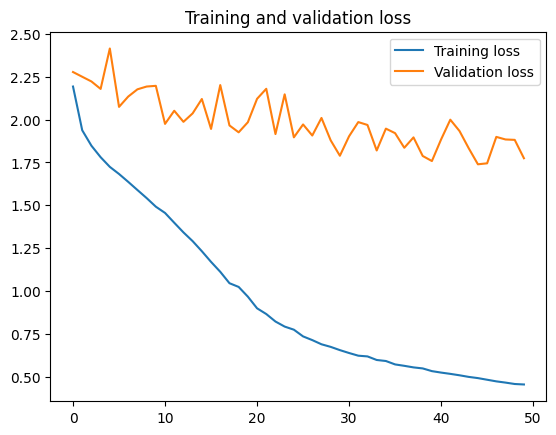

1875/1875 [==============================] - 7s 3ms/step - loss: 1.5726 - accuracy: 0.4597
Accuracy for test data :  0.45969998836517334
Loss for test data :  1.5726276636123657


In [83]:
run_model(model1_work, 50)

938/938 [==============================] - 4s 3ms/step


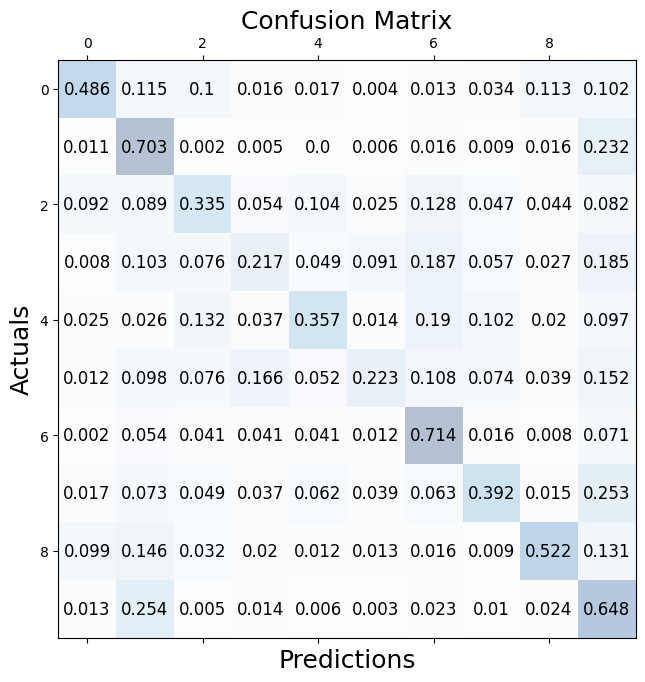

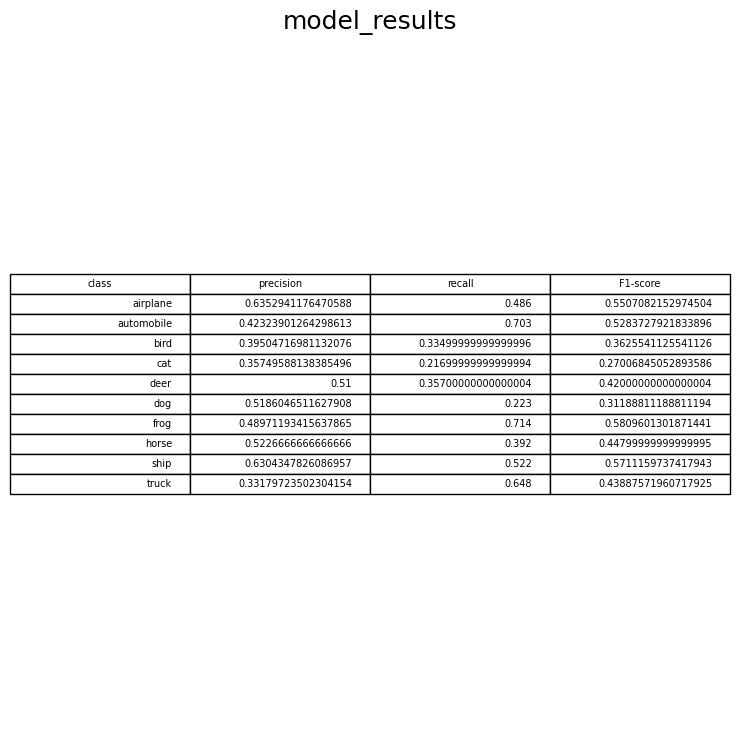

In [84]:
result_model(model1_work)

## MobileNet на усеченном датасете с аугментацией. Аугментация проводится в модели.

In [85]:
model2_work = ModelVisualization(model2, data1)

Epoch 1/50
2945/2945 [==============================] - 60s 16ms/step - loss: 2.3518 - accuracy: 0.1152 - val_loss: 2.4756 - val_accuracy: 0.0840
Epoch 2/50
2945/2945 [==============================] - 45s 15ms/step - loss: 2.2564 - accuracy: 0.1410 - val_loss: 2.3169 - val_accuracy: 0.1241
Epoch 3/50
2945/2945 [==============================] - 45s 15ms/step - loss: 2.2281 - accuracy: 0.1536 - val_loss: 2.3133 - val_accuracy: 0.1217
Epoch 4/50
2945/2945 [==============================] - 46s 16ms/step - loss: 2.1901 - accuracy: 0.1690 - val_loss: 2.2481 - val_accuracy: 0.1620
Epoch 5/50
2945/2945 [==============================] - 45s 15ms/step - loss: 2.1629 - accuracy: 0.1811 - val_loss: 2.1928 - val_accuracy: 0.1714
Epoch 6/50
2945/2945 [==============================] - 45s 15ms/step - loss: 2.1584 - accuracy: 0.1826 - val_loss: 2.1939 - val_accuracy: 0.1800
Epoch 7/50
2945/2945 [==============================] - 45s 15ms/step - loss: 2.1358 - accuracy: 0.1914 - val_loss: 2.2549 -

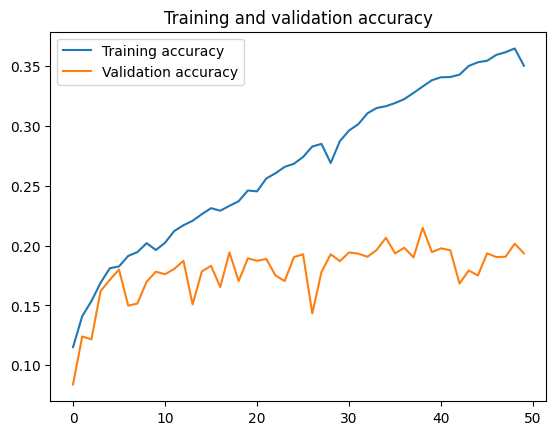

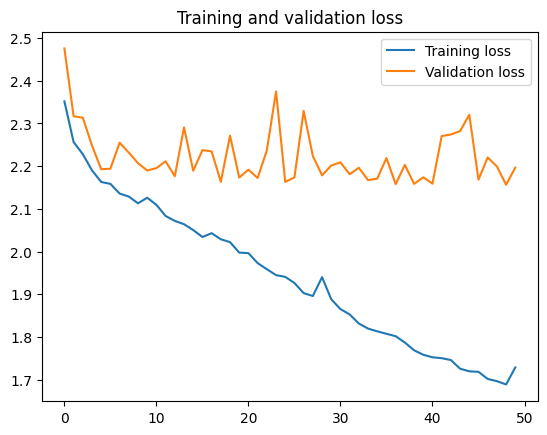

1875/1875 [==============================] - 7s 4ms/step - loss: 1.8785 - accuracy: 0.3159
Accuracy for test data :  0.3158999979496002
Loss for test data :  1.8784503936767578


In [86]:
run_model(model2_work, 50)

938/938 [==============================] - 3s 3ms/step


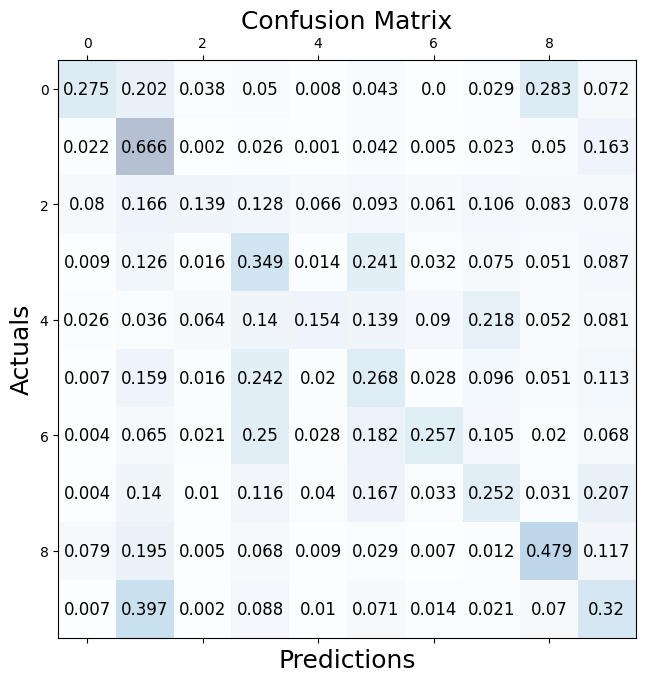

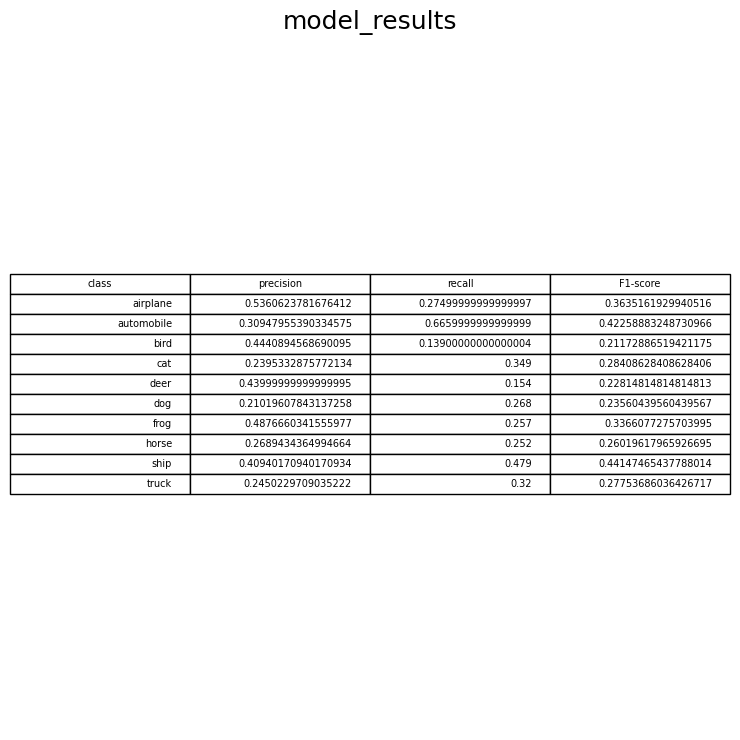

In [87]:
result_model(model2_work)

## MobileNet на аугментированном датасете 1. Аугментация проводится в датасете.

In [88]:
model3_work = ModelVisualization(model, data1)

Epoch 1/50
2945/2945 [==============================] - 38s 13ms/step - loss: 1.2159 - accuracy: 0.5688 - val_loss: 1.9472 - val_accuracy: 0.2882
Epoch 2/50
2945/2945 [==============================] - 38s 13ms/step - loss: 0.7864 - accuracy: 0.7250 - val_loss: 1.9245 - val_accuracy: 0.3025
Epoch 3/50
2945/2945 [==============================] - 38s 13ms/step - loss: 0.6709 - accuracy: 0.7650 - val_loss: 1.8980 - val_accuracy: 0.3069
Epoch 4/50
2945/2945 [==============================] - 38s 13ms/step - loss: 0.6086 - accuracy: 0.7873 - val_loss: 1.8631 - val_accuracy: 0.3280
Epoch 5/50
2945/2945 [==============================] - 38s 13ms/step - loss: 0.5666 - accuracy: 0.8010 - val_loss: 1.8450 - val_accuracy: 0.3350
Epoch 6/50
2945/2945 [==============================] - 38s 13ms/step - loss: 0.5349 - accuracy: 0.8122 - val_loss: 1.7963 - val_accuracy: 0.3417
Epoch 7/50
2945/2945 [==============================] - 38s 13ms/step - loss: 0.5048 - accuracy: 0.8230 - val_loss: 1.7623 -

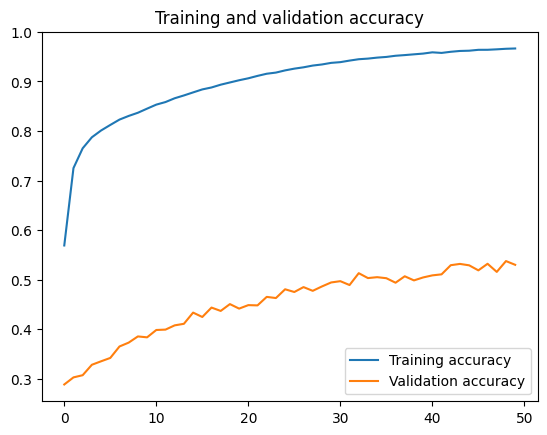

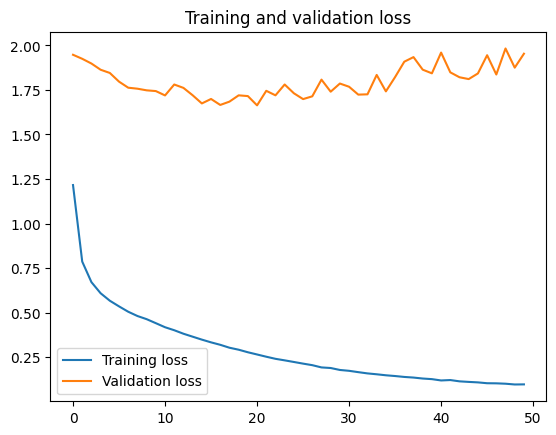

1875/1875 [==============================] - 8s 4ms/step - loss: 2.0463 - accuracy: 0.5454
Accuracy for test data :  0.5454000234603882
Loss for test data :  2.046344757080078


In [89]:
run_model(model3_work, 50)

938/938 [==============================] - 3s 3ms/step


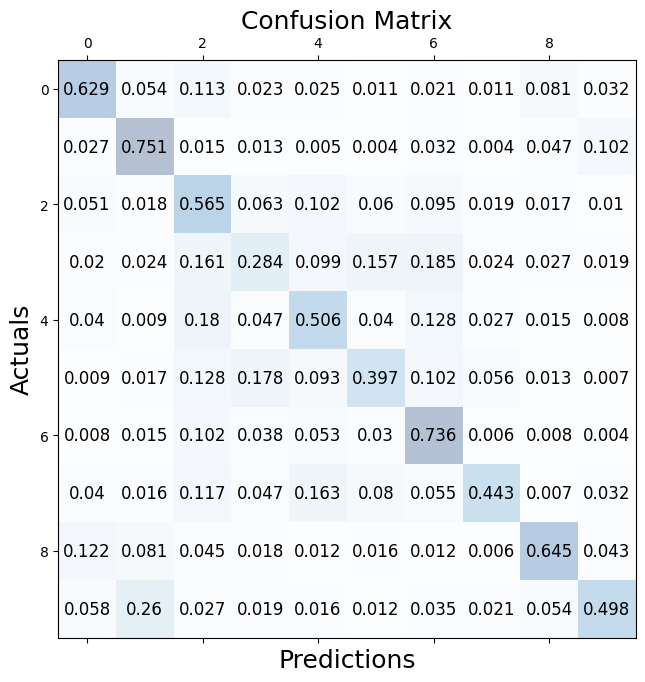

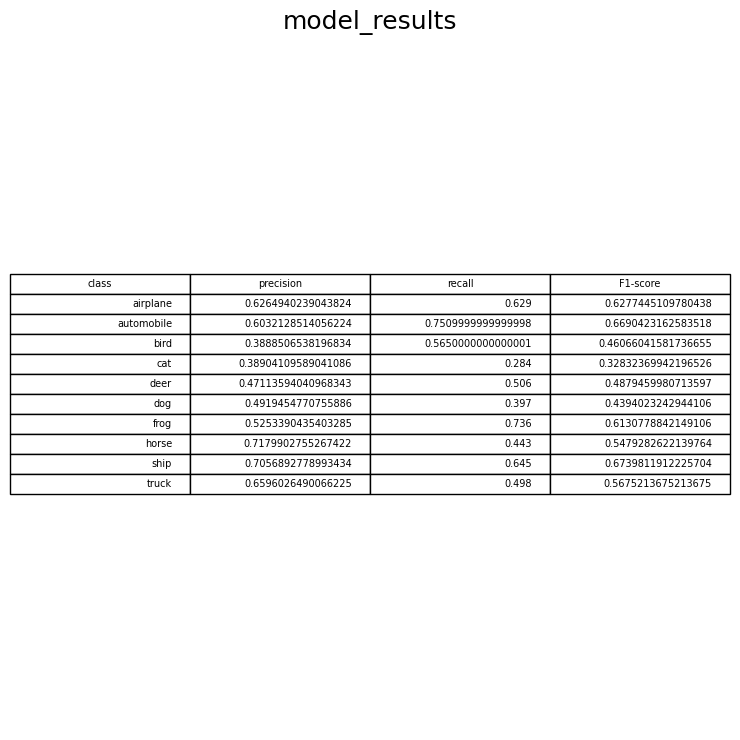

In [90]:
result_model(model3_work)

## MobileNet на аугментированном датасете 2. Аугментация проводится в датасете. Аугментация частичная

In [91]:
model4_work = ModelVisualization(model, data2)

Epoch 1/50
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0684 - accuracy: 0.9761 - val_loss: 0.0027 - val_accuracy: 0.9992
Epoch 2/50
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0542 - accuracy: 0.9809 - val_loss: 0.0034 - val_accuracy: 0.9989
Epoch 3/50
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0562 - accuracy: 0.9803 - val_loss: 0.0018 - val_accuracy: 0.9997
Epoch 4/50
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0484 - accuracy: 0.9830 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/50
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0521 - accuracy: 0.9821 - val_loss: 0.0061 - val_accuracy: 0.9981
Epoch 6/50
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0456 - accuracy: 0.9838 - val_loss: 0.0055 - val_accuracy: 0.9976
Epoch 7/50
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0471 - accuracy: 0.9839 - val_loss: 0.0066 -

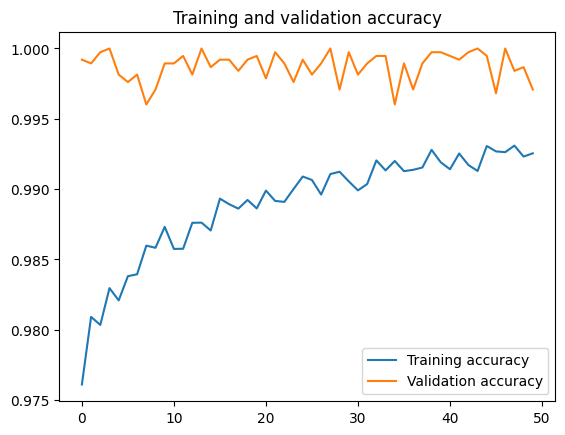

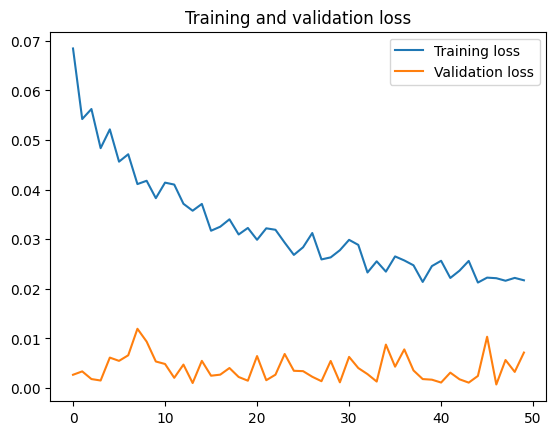

2500/2500 [==============================] - 10s 4ms/step - loss: 2.6270 - accuracy: 0.5802
Accuracy for test data :  0.5802000164985657
Loss for test data :  2.627049684524536


In [92]:
run_model(model4_work, 50)

1250/1250 [==============================] - 4s 3ms/step


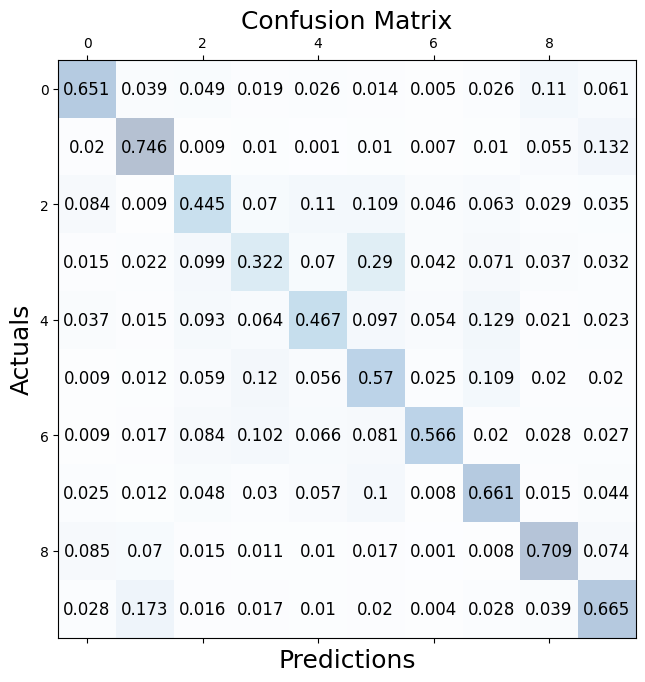

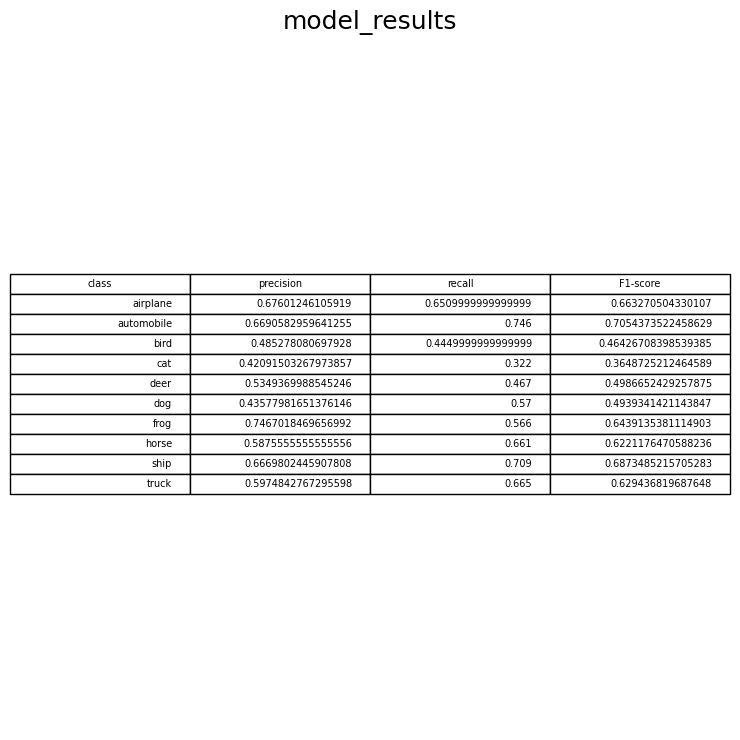

In [93]:
result_model(model4_work)

## MobileNet на аугментированном датасете 3. Аугментация проводится в датасете. Аугментация минимальная

In [94]:
model5_work = ModelVisualization(model, data3)

Epoch 1/50
695/695 [==============================] - 9s 13ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/50
695/695 [==============================] - 9s 13ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 6.1795e-04 - val_accuracy: 0.9997
Epoch 3/50
695/695 [==============================] - 9s 13ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.0051 - val_accuracy: 0.9984
Epoch 4/50
695/695 [==============================] - 9s 13ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 7.7856e-04 - val_accuracy: 1.0000
Epoch 5/50
695/695 [==============================] - 9s 13ms/step - loss: 0.0212 - accuracy: 0.9924 - val_loss: 0.0043 - val_accuracy: 0.9981
Epoch 6/50
695/695 [==============================] - 9s 13ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0017 - val_accuracy: 0.9992
Epoch 7/50
695/695 [==============================] - 9s 13ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 4.5518e-04 - val_accu

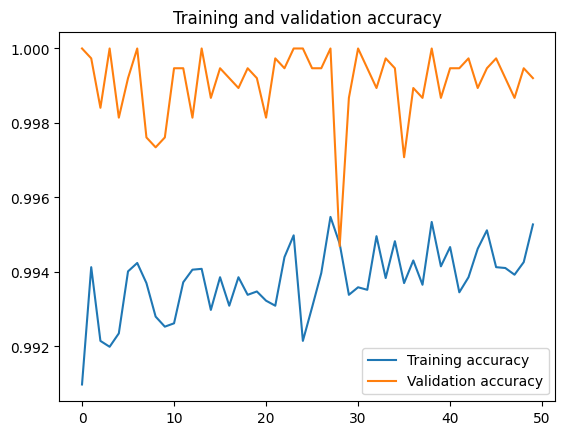

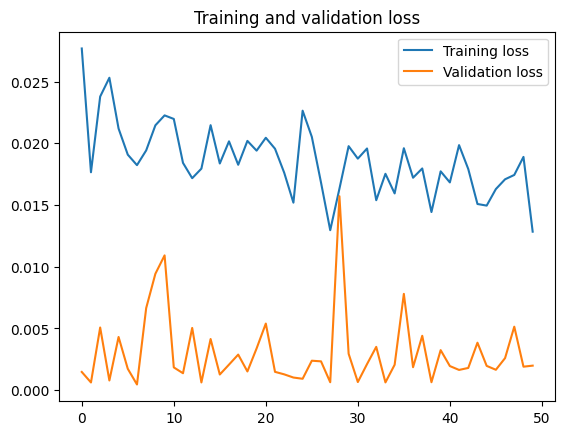

1563/1563 [==============================] - 6s 4ms/step - loss: 2.8369 - accuracy: 0.5938
Accuracy for test data :  0.5938000082969666
Loss for test data :  2.8369460105895996


In [95]:
run_model(model5_work, 50)

782/782 [==============================] - 3s 3ms/step


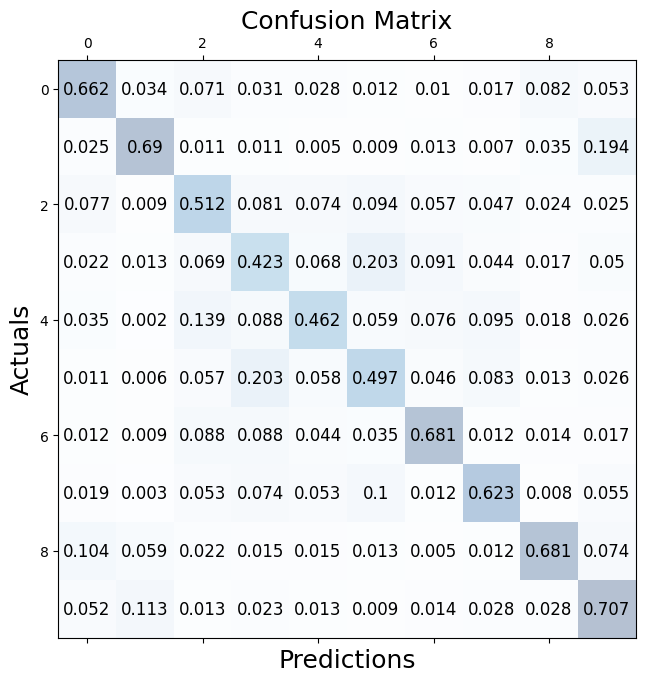

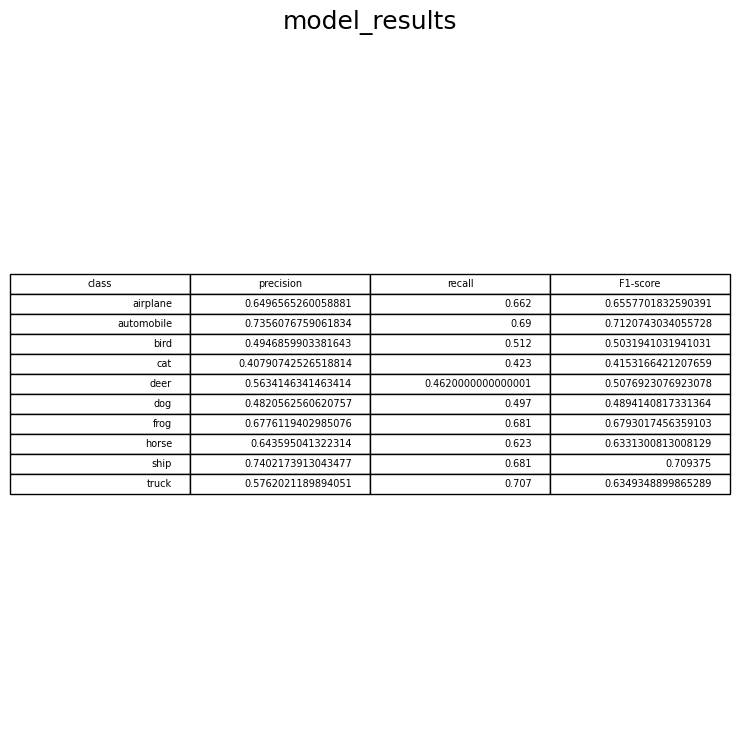

In [96]:
result_model(model5_work)